In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

# Cargamos los datos
viviendas = pd.read_csv(
    'Vivienda.csv',
    engine='python', index_col=0)

##Mostarmos las primeras 5 filas
viviendas.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,leased
index,,,,,,,,,,,,,,
1,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,yes
2,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,no
3,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,no
4,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,yes
5,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,yes


In [3]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 1 to 545
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    int64 
 13  leased            545 non-null    object
dtypes: int64(13), object(1)
memory usage: 63.9+ KB


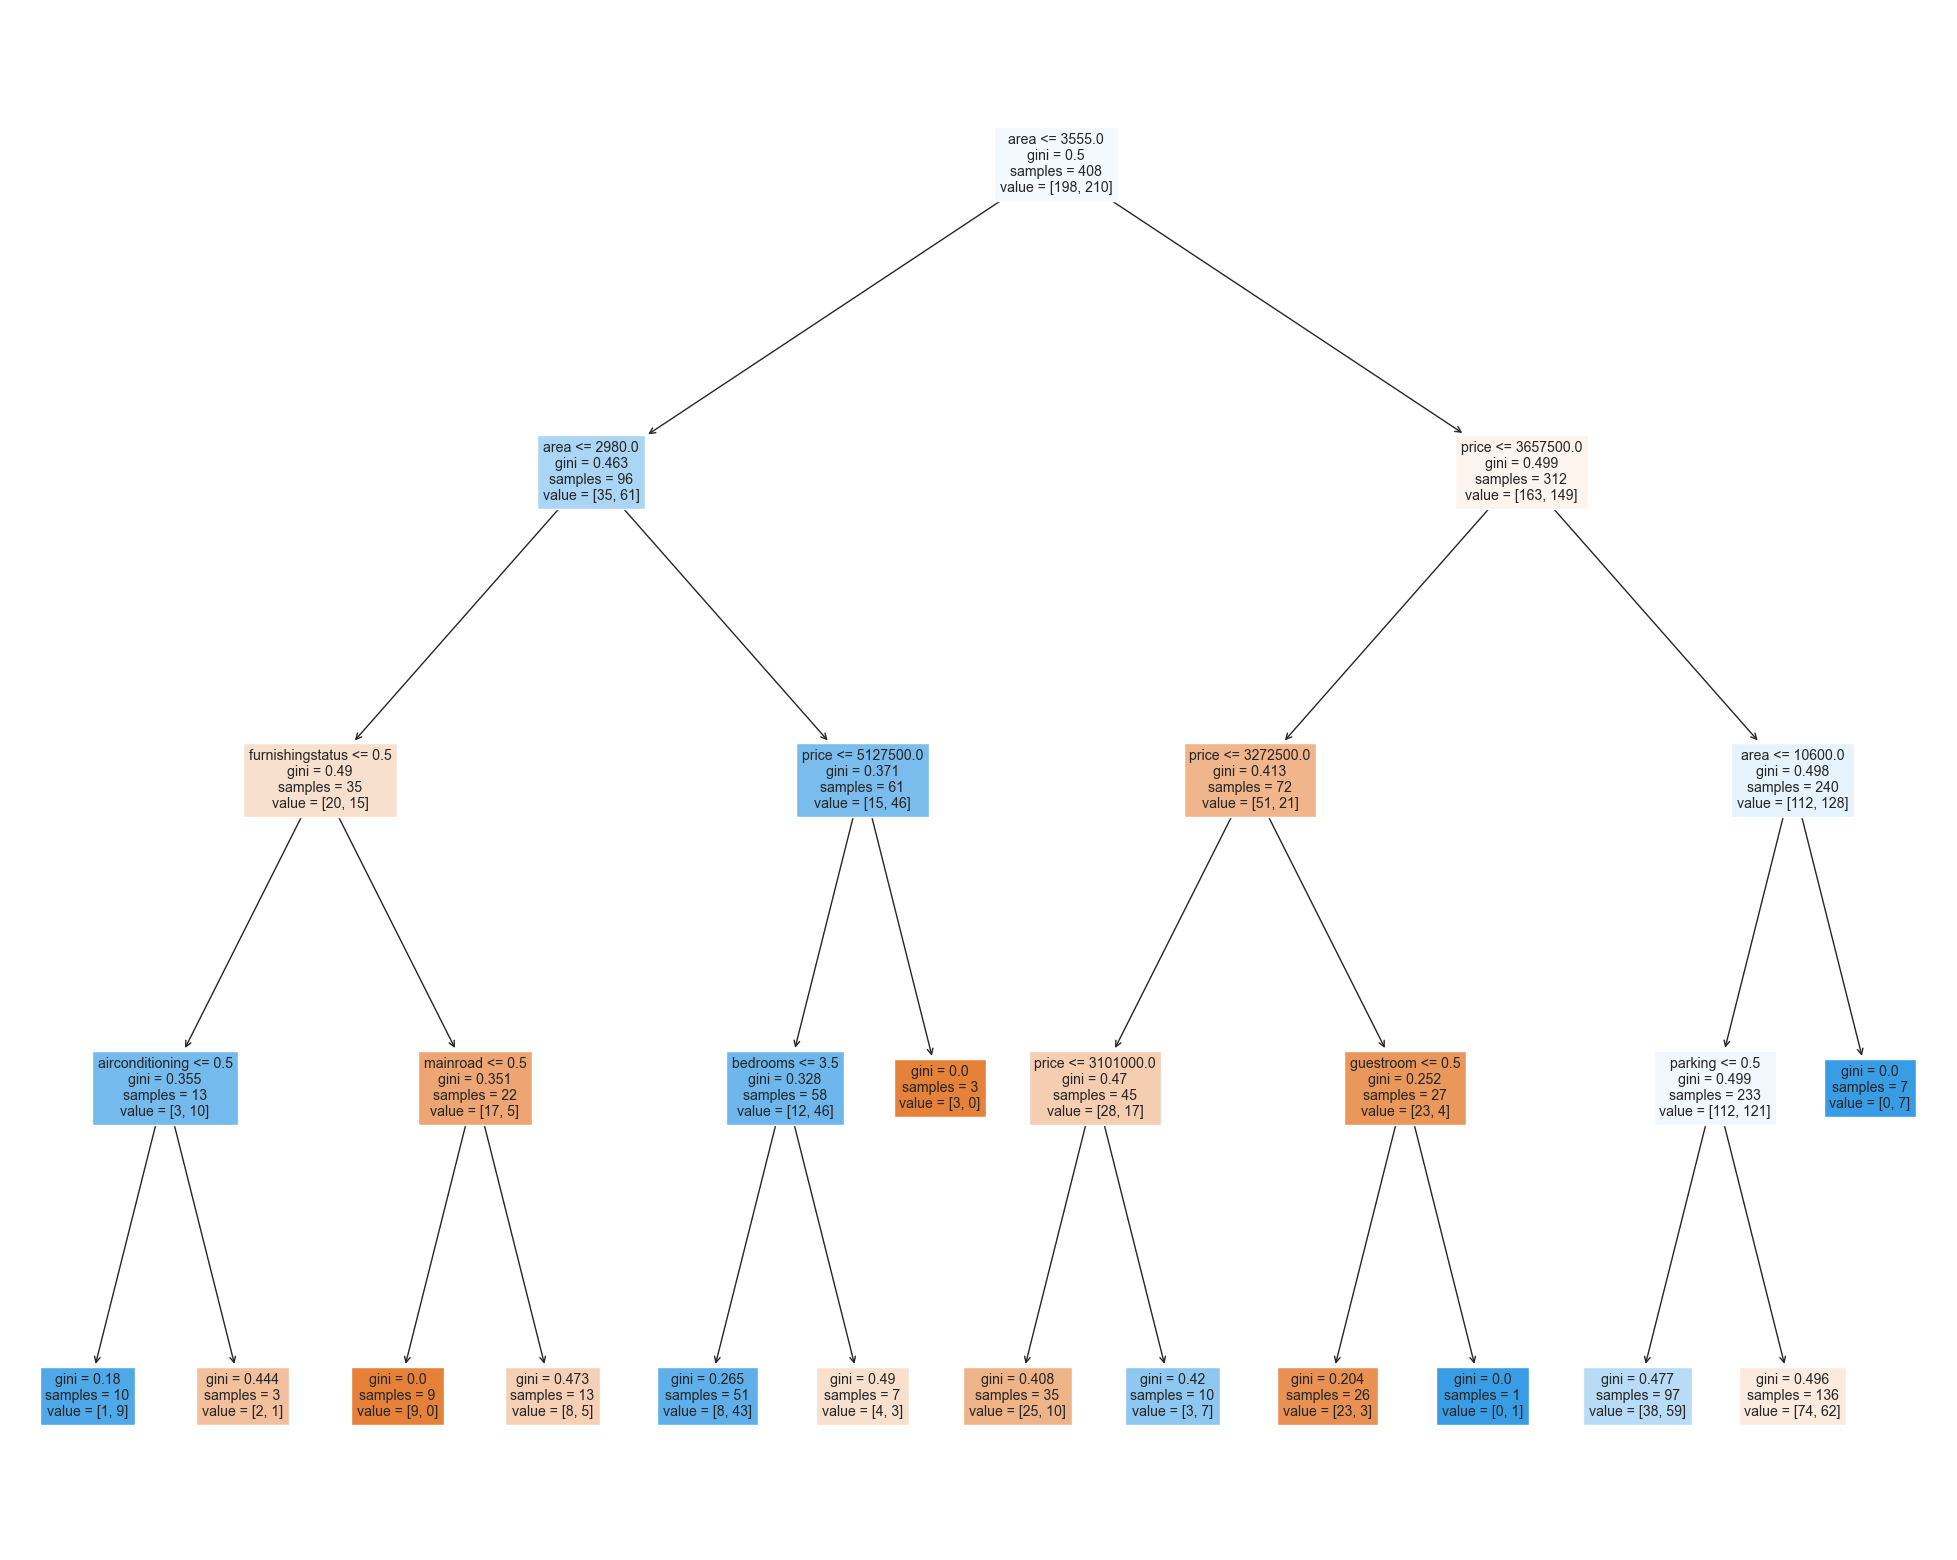

In [125]:
from sklearn.tree import plot_tree

# Separamos las columnas de las variables predictoras de la columna que tiene la variable a predecir

# Definir las características y la variable objetivo
caracteristicas = viviendas.drop(['leased'], axis=1)
objetivo = viviendas['leased']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split

# Dividimos nuestros datos en las tablas de testing y training
X_train, X_test, Y_train, Y_test = train_test_split(caracteristicas, objetivo, train_size=0.75, random_state=0)

# Creamos el modelo del árbol de decisión
arbol = DecisionTreeClassifier(max_depth=4)
arbol_vivienda = arbol.fit(X_train, Y_train)

# Graficamos el árbol de decisión
fig = plt.figure(figsize=(25, 20))
plot_tree(arbol_vivienda, filled=True, feature_names=viviendas.columns)
plt.show()

In [ ]:
# Predicción de los datos de prueba
viviendas['pred'] = arbol_vivienda.predict(caracteristicas)

# Comparar las predicciones con la variable objetivo
comparacion = (viviendas['leased'] == viviendas['pred'])
aciertos = comparacion.sum()
precision = aciertos / len(viviendas) * 100
print(f"Probabilidad de Acierto: {precision:.2f}%")

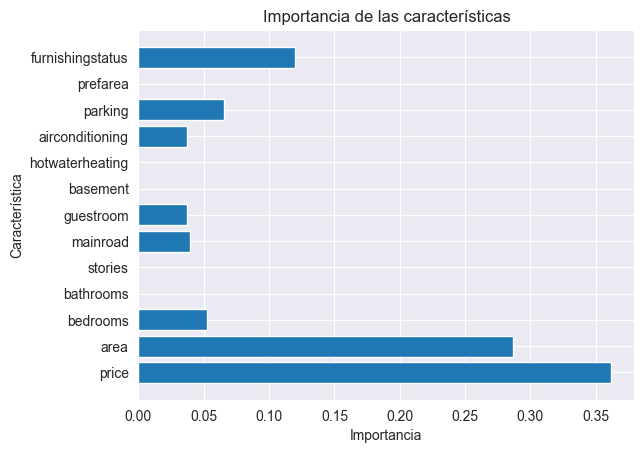

In [145]:
# Obtener la importancia de cada característica
importancia_caracteristicas = arbol_vivienda.feature_importances_

# Crear un gráfico de barras para visualizar las importancias de las características
plt.barh(viviendas.columns[:-2], importancia_caracteristicas)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [148]:
# Buscar viviendas
condiciones = ((X_test['bathrooms'] <= 4) & (X_test['area'] >= 5000) & (X_test['airconditioning'] == 1) & (X_test['price'] <= 4700000))

# Seleccionar las filas que cumplen con las condiciones
resultados = X_test.loc[condiciones]

# Imprimir las características de las viviendas seleccionadas
for i, row in resultados.iterrows():
    print(f"Vivienda {i}:\n{row}\n")

Vivienda 236:
price               4620000
area                   5680
bedrooms                  3
bathrooms                 1
stories                   2
mainroad                  1
guestroom                 1
basement                  0
hotwaterheating           0
airconditioning           1
parking                   1
prefarea                  0
furnishingstatus          1
Name: 236, dtype: int64

Vivienda 343:
price               3850000
area                   7152
bedrooms                  3
bathrooms                 1
stories                   2
mainroad                  1
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           1
parking                   0
prefarea                  0
furnishingstatus          2
Name: 343, dtype: int64

